# Jinlun Zhang
## Student #: 220668810
### Purpose: Testing changes to an existing feature. 
#### You would like to release changes to a key feature and have prepared 2 possible variants.  You've been running an experiment for 2 weeks, and now have some data with the experiment results. Specifically, you have the Click-Through-Rate (CTR) and Average Time Spent, in minutes, for each feature. A CTR of 1 would indicate the user has fully clicked on everything in a feature, while a CTR of 0 means they have not clicked anything. Task is as follows:

1. Analyze the results to determine which feature (if any) results in CTR or Time Spent lift.

2. Conduct statistical testing to determine if there is a statistically significant difference between the features and the control group.

3. Summarize your results. Make a recommendation to the engineering team about which feature to deploy. 

4. Create a roll-out plan. How quickly will you introduce the feature to your audience?


In [140]:
import numpy as np
import pandas as pd
from scipy import stats
import seaborn as sns

# Load the data set
df = pd.read_csv("experiment_dataset.csv")
# load through github alternatively if the dataset is not in your local directory
# df = pd.read_csv("https://raw.githubusercontent.com/JinL-Zhang/Schulich_MBAN-6110/main/A2/experiment_dataset.csv")

df.head(10) # display the first 10 records 

,Unnamed: 0,Age,Location,Device,Variant,Time Spent,CTR
0,0,62,Location2,Device2,Control,13.928669,0.084776
1,1,18,Location1,Device1,Variant B,11.310518,0.096859
2,2,21,Location2,Device1,Variant B,24.842100,0.097630
3,3,21,Location1,Device3,Variant B,20.061300,0.109783
4,4,57,Location1,Device2,Variant B,34.495503,0.068579
5,5,27,Location3,Device1,Variant B,26.129246,0.149341
6,6,37,Location3,Device3,Variant B,20.525362,0.095788
7,7,39,Location2,Device1,Variant A,21.525217,0.149985
8,8,54,Location3,Device2,Control,21.910608,0.135535
9,9,41,Location1,Device2,Variant A,27.642788,0.137266


In [141]:
# drop out the unncessary index column
df.drop(columns=['Unnamed: 0'], inplace=True)
df.info()

# The data is quite clean as there are no missing values within the dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Age         1000 non-null   int64  
 1   Location    1000 non-null   object 
 2   Device      1000 non-null   object 
 3   Variant     1000 non-null   object 
 4   Time Spent  1000 non-null   float64
 5   CTR         1000 non-null   float64
dtypes: float64(2), int64(1), object(3)
memory usage: 47.0+ KB


In [111]:
df.describe(include='all')

,Age,Location,Device,Variant,Time Spent,CTR
count,1000.000000,1000,1000,1000,1000.000000,1000.000000
unique,NaN,3,3,3,NaN,NaN
top,NaN,Location2,Device3,Control,NaN,NaN
freq,NaN,343,346,340,NaN,NaN
mean,40.715000,NaN,NaN,NaN,22.713345,0.109145
std,13.655557,NaN,NaN,NaN,5.479292,0.022366
min,18.000000,NaN,NaN,NaN,7.114806,0.012975
25%,28.000000,NaN,NaN,NaN,19.216608,0.094286
50%,41.000000,NaN,NaN,NaN,22.506707,0.108944
75%,53.000000,NaN,NaN,NaN,26.255950,0.124238


#### Partition the dataset into 3 variant groups

In [142]:
df_control = df[df['Variant'] == "Control"].reset_index()
df_control

,index,Age,Location,Device,Variant,Time Spent,CTR
0,0,62,Location2,Device2,Control,13.928669,0.084776
1,8,54,Location3,Device2,Control,21.910608,0.135535
2,16,57,Location1,Device3,Control,37.527368,0.130966
3,19,42,Location1,Device3,Control,21.532687,0.081168
4,22,43,Location3,Device1,Control,16.171548,0.085845
...,...,...,...,...,...,...,...
335,986,21,Location3,Device1,Control,22.134507,0.106503
336,990,54,Location3,Device1,Control,19.357402,0.100896
337,994,52,Location1,Device2,Control,15.012350,0.071914
338,996,38,Location3,Device2,Control,30.075898,0.078151


In [143]:
df_var_a = df[df['Variant'] == "Variant A"].reset_index()
df_var_a

,index,Age,Location,Device,Variant,Time Spent,CTR
0,7,39,Location2,Device1,Variant A,21.525217,0.149985
1,9,41,Location1,Device2,Variant A,27.642788,0.137266
2,13,30,Location2,Device3,Variant A,26.208502,0.087875
3,15,56,Location2,Device2,Variant A,7.800901,0.069781
4,17,41,Location2,Device3,Variant A,32.699437,0.114626
...,...,...,...,...,...,...,...
325,983,48,Location2,Device1,Variant A,28.171759,0.144396
326,984,20,Location1,Device3,Variant A,31.648129,0.121159
327,985,37,Location1,Device3,Variant A,24.543317,0.137414
328,992,44,Location1,Device2,Variant A,20.161483,0.098470


In [144]:
df_var_b = df[df['Variant'] == "Variant B"].reset_index()
df_var_b

,index,Age,Location,Device,Variant,Time Spent,CTR
0,1,18,Location1,Device1,Variant B,11.310518,0.096859
1,2,21,Location2,Device1,Variant B,24.842100,0.097630
2,3,21,Location1,Device3,Variant B,20.061300,0.109783
3,4,57,Location1,Device2,Variant B,34.495503,0.068579
4,5,27,Location3,Device1,Variant B,26.129246,0.149341
...,...,...,...,...,...,...,...
325,989,31,Location2,Device2,Variant B,32.952763,0.098476
326,991,35,Location3,Device1,Variant B,22.409808,0.100951
327,995,39,Location2,Device2,Variant B,17.252030,0.092211
328,998,35,Location2,Device2,Variant B,14.680299,0.095423


We can see that the number of variant A samples is equal to that of variant B samples, while the number of control samples is slightly more than that of variant samples, indicating that the comparisons without using average() between the 3 groups may also be acceptable (as the 3 groups have the similar numbers of records)

### Assuming the populations from which the samples were obtained are normally or approximately normally distributed, and homoscedastic. Then, the independent t-test can be performed as the starting point

#### However, before moving into determining which variant (if any) results in CTR or Time Spent lift, we may need to ensure that the 'Time Spent' and 'CTR' are independent from categorical variables 'Location' and 'Device' for the 3 variant groups. So that we can assure that the increase in the 'Time Spent' and 'CTR' can be majorly attributed to the feature variant difference ('age' is ignored here as we will perform testings on 'age' later)

#### Test if 'Time Spent' is independent of 'location' for the 3 groups, assuming the significance level (alpha) being 0.05

In [162]:
# For the control group
# Finds out the 'Time Spent' data for each 'Location' as a list
CategoryGroupLists=df_control.groupby('Location')['Time Spent'].apply(list)
 
# Performing the ANOVA test
# We accept the H0 only when P-Value > 0.05
f_stat, p_val = stats.f_oneway(*CategoryGroupLists)

# NOte: Null hypothesis is that 'Time Spent' and 'location' are NOT correlated, 
# namely the population means of all groups are equal

print(f"F-statistic: {f_stat}")
print(f"P-value: {p_val}")

F-statistic: 0.5311296350355236
P-value: 0.5884317676358968


In [163]:
# For the variant A group
# Finds out the 'Time Spent' data for each 'Location' as a list
CategoryGroupLists=df_var_a.groupby('Location')['Time Spent'].apply(list)
 
# Performing the ANOVA test
# We accept the H0 only when P-Value > 0.05
f_stat, p_val = stats.f_oneway(*CategoryGroupLists)

# NOte: Null hypothesis is that 'Time Spent' and 'location' are NOT correlated, 
# namely the population means of all groups are equal

print(f"F-statistic: {f_stat}")
print(f"P-value: {p_val}")

F-statistic: 0.10786865370947395
P-value: 0.8977774352465695


In [164]:
# For the variant B group
# Finds out the 'Time Spent' data for each 'Location' as a list
CategoryGroupLists=df_var_b.groupby('Location')['Time Spent'].apply(list)
 
# Performing the ANOVA test
# We accept the H0 only when P-Value > 0.05
f_stat, p_val = stats.f_oneway(*CategoryGroupLists)

# NOte: Null hypothesis is that 'Time Spent' and 'location' are NOT correlated, 
# namely the population means of all groups are equal

print(f"F-statistic: {f_stat}")
print(f"P-value: {p_val}")

F-statistic: 0.7282411459489533
P-value: 0.4835386034301028


#### Since all the p-values are much larger than 0.05, we can safely assure that the 'location' are uncorrelated with 'Time Spent' (null hypothesis is true) for the 3 variant groups
#### Now, we can quickly test if the 'location' are correlated with 'CTR' for the 3 variant groups

In [165]:
# Finds out the 'CTR' data for each 'Location' as a list
controlLists=df_control.groupby('Location')['CTR'].apply(list)
var_a_Lists=df_var_a.groupby('Location')['CTR'].apply(list)
var_b_Lists=df_var_b.groupby('Location')['CTR'].apply(list)

# Performing the ANOVA test
# We accept the H0 only when P-Value > 0.05
for i in [controlLists,var_a_Lists,var_b_Lists]:
    f_stat, p_val = stats.f_oneway(*i)
    print(f"F-statistic: {f_stat}")
    print(f"P-value: {p_val}")
    print()

# Note: Null hypothesis is that 'Time Spent' and 'location' are NOT correlated, 
# namely the population means of all groups are equal



F-statistic: 0.35909297723125644
P-value: 0.698576290576147

F-statistic: 1.2708992496308231
P-value: 0.28196134434679604

F-statistic: 0.7332333999893166
P-value: 0.4811413587711958



#### Again, all p-value > 0.05, we safely assure that the 'location' are uncorrelated with 'CTR'
#### First insight: Location of users for the 3 groups do not affect the user's time spent and CTR (as no statistically significant difference detected) 
#### Now, we need to verify if we can arrive the same conclusion for 'device'

In [153]:
# Finds out the 'CTR' data for each 'device' as a list
controlLists=df_control.groupby('Device')['CTR'].apply(list)
var_a_Lists=df_var_a.groupby('Device')['CTR'].apply(list)
var_b_Lists=df_var_b.groupby('Device')['CTR'].apply(list)

# Performing the ANOVA test
# We accept the H0 only when P-Value > 0.05
for i in [controlLists,var_a_Lists,var_b_Lists]:
    f_stat, p_val = stats.f_oneway(*i)
    print(f"F-statistic: {f_stat}")
    print(f"P-value: {p_val}")
    print()


F-statistic: 0.10031914209301424
P-value: 0.9045756948934269

F-statistic: 1.7320204846271345
P-value: 0.1785456849076847

F-statistic: 0.576083130987154
P-value: 0.5626651374654156



In [150]:
# Finds out the 'Time Spent' data for each 'device' as a list
controlLists=df_control.groupby('Device')['Time Spent'].apply(list)
var_a_Lists=df_var_a.groupby('Device')['Time Spent'].apply(list)
var_b_Lists=df_var_b.groupby('Device')['Time Spent'].apply(list)

# Performing the ANOVA test
# We accept the H0 only when P-Value > 0.05
for i in [controlLists,var_a_Lists,var_b_Lists]:
    f_stat, p_val = stats.f_oneway(*i)
    print(f"F-statistic: {f_stat}")
    print(f"P-value: {p_val}")
    print()

F-statistic: 0.3823447515565521
P-value: 0.6825553776327133

F-statistic: 0.6105113572129155
P-value: 0.5436909187739365

F-statistic: 1.2031299296930864
P-value: 0.3015785231949159



#### Once again, all p-value > 0.05, we can safely assure that the 'device' is also uncorrelated with 'CTR' and 'Time Spent'
#### Second insight: Devices of users for the 3 groups do not affect the user's time spent and CTR 

#### Now, we can use unpaired / independent t-test to determine which variant (if any) results in CTR or Time Spent lift.
Note: The paired t-test is often used when we are interested in the difference between two variables for the same subject. Often the two variables are separated by time. Hence, as we have control and variant groups in this case (subject of 2 groups are different), paired t-test should not be used, but the independent t-test  

In [166]:
# Since we want to see if the variant group increase the time spent or not, we should conduct a right-tail test

for i in [df_var_a['Time Spent'], df_var_b['Time Spent']]:
    t_stat, p_val = stats.ttest_ind(i, df_control['Time Spent'], alternative='greater')
    # ".ttest_ind()" defaults to give a null hypothesis that the population mean of the 2 provided groups are the same 
    # However, for a right-tailed t-test, the null hypothesis will be that 
    # the population mean of the first group (variant) is less than or equal to the population mean of the second group (controlled).
    # Thus, if p <= 0.05, then the population mean of the first group (variant) is greater than the population mean of the second group (controlled).

    print(f"T-statistic: {t_stat}")
    print(f"P-value: {p_val}")
    print()



T-statistic: 12.142363487472364
P-value: 4.2442828224982245e-31

T-statistic: 8.174237395991806
P-value: 7.48179038142591e-16



In [167]:
for i in [df_var_a['CTR'], df_var_b['CTR']]:
    t_stat, p_val = stats.ttest_ind(i, df_control['CTR'], alternative='greater') # alternative='greater' specifies a right-tailed test
    # ".ttest_ind()" defaults to give a null hypothesis that the population mean of the 2 provided groups are the same 
    # However, for a right-tailed t-test, the null hypothesis will be that 
    # the population mean of the first group (variant) is less than or equal to the population mean of the second group (controlled).
    # Thus, if p <= 0.05, then the population mean of the first group (variant) is greater than the population mean of the second group (controlled).

    print(f"T-statistic: {t_stat}")
    print(f"P-value: {p_val}")
    print()

T-statistic: 13.829424737499187
P-value: 9.801390686621579e-39

T-statistic: 6.4718143491783255
P-value: 9.371599099991053e-11



#### As observed from above, all the p-values of the right-tail tests are much less than our pre-defined significance level (0.05), rejecting the null hypothesis, meaning that the population means of the 'time spent' and 'CTR' are higher in both of the variant A and the variant B groups than the controlled group. This indicates that both of the variant features result in CTR and Time Spent lift, in which the variant A may lead to a higher increase in 'time spent' and 'CTR' as the magnitude of variant A p-value is much smaller than that of variant b (namely the differences observed in "time spent" and "CTR" between the control group and variant A are more substantial and statistically significant compared to the differences between the control group and variant B)

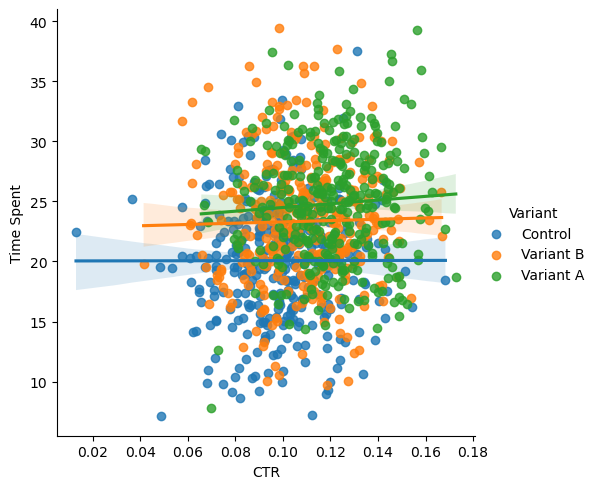

In [169]:
# Below visualization also support our above conclusion
sns.lmplot(x="CTR", y="Time Spent",hue = "Variant", data= df)

#### The other statistical testing conducted to determine if there is a statistically significant difference between the features and the control group are shown below

### chi-squared test by converting the 'Time Spent' and 'CRT' into categorical variables using bins

In [174]:
df_time_cat = pd.cut(df['Time Spent'], bins=[7, 19, 23, 26, 40]) # each bin represents a 25th percentile
df_ctr_cat = pd.cut(df['CTR'], bins=[0.01, 0.09, 0.1, 0.12, 0.18]) # each bin represents a 25th percentile

for i in [df_time_cat, df_ctr_cat]:
    # Create a contingency table
    contingency_table = pd.crosstab(df['Variant'], i)

    chi2, p_val, dof, expected = stats.chi2_contingency(contingency_table)

    print(f"Chi-squared: {chi2}")
    print(f"P-value: {p_val}")
    print()

# again, as the two p value are very small (<< significance level), 
# the null hypothesis (categorical variables are independent) is rejected, and
# the 2 pairs of categorical variables ('Time Spent' and 'Variant', 'CTR' and 'Variant') are somehow correlated.
# This means that there is a statistically significant difference between the 'Time Spent' & 'CTR' and 
# the variant of the feature the users are using


Chi-squared: 118.63165238004552
P-value: 3.158027616045154e-23

Chi-squared: 154.88074389722036
P-value: 7.181144359602533e-31



### Now, let's try ANOVA test to see if there is a statistically significant difference between the 'Time Spent' & 'CTR' population means of the 3 groups

In [175]:
for i in ['Time Spent', 'CTR']:
    f_stat, p_val = stats.f_oneway(df_control[i], df_var_a[i], df_var_b[i])

    print(f"F-statistic: {f_stat}")
    print(f"P-value: {p_val}")
    print()

# since the two p values are very close to 0, we know that the population means of the 3 groups for 'Time Spent' and 'CTR' are not equal
# Note: To know which 2 groups have different population means, use the pairwise t-test on all the pairs of the 3 groups


F-statistic: 75.60840947416146
P-value: 2.676826588910432e-31

F-statistic: 93.588915936227
P-value: 5.638952705781955e-38



#### Now I want to see if the variant A group has a higher 'Time Spent' or 'CTR' population mean than that of variant B

In [176]:
# perform the right-tailed independent t-test again
for i in ['Time Spent', 'CTR']:
    t_stat, p_val = stats.ttest_ind(df_var_a[i],df_var_b[i], alternative='greater') # alternative='greater' specifies a right-tailed test
    # ".ttest_ind()" defaults to give a null hypothesis that the population mean of the 2 provided groups are the same 
    # However, for a right-tailed t-test, the null hypothesis will be that 
    # the population mean of the first group (variant A) is less than or equal to the population mean of the second group (variant B).
    # Thus, if p <= 0.05, then the population mean of the first group (variant A) is greater than the population mean of the second group (variant B).

    print(f"T-statistic: {t_stat}")
    print(f"P-value: {p_val}")
    print()

T-statistic: 3.6788175394209075
P-value: 0.00012673855073826325

T-statistic: 7.08499696316128
P-value: 1.7935902439932884e-12



### Interestingly, the variant A is yielding higher 'Time Spent' and 'CTR' than the variant B, though both of them are giving higher 'Time Spent' and 'CTR' than the control group. This may suggest that we should recommend variant A to the engineering team to deploy first.

In [127]:
# we can also try to see if 'Time Spent' and 'CTR' are correlated or not 
df.corr(numeric_only=True)

,Age,Time Spent,CTR
Age,1.00000,0.001970,-0.001080
Time Spent,0.00197,1.000000,0.163598
CTR,-0.00108,0.163598,1.000000


In [154]:
# Check the p-value of Pearson correlation between 'Time Spent' and 'CTR' in general
pearson_corr, p_val = stats.pearsonr(df['Time Spent'], df['CTR']) 
print(f"Pearson's correlation: {pearson_corr}")
print(f"P-value: {p_val}")

# Since the p-values are much smaller than the significance level, we should reject the null hypothesis, which is  
# "No linear relationship between the 2 numeric variables". This means that 'Time Spent' and 'CTR' are linearly correlated
# regardless of the variant groups

Pearson's correlation: 0.16359787633728382
P-value: 1.971187664363712e-07


### As observed from above 2 cells, in general, 'age' seems not be a factor that affects the 'Time Spent' and 'CTR', while there is a linear correlation between 'Time Spent' and 'CTR' (regardless of the variant groups)

### Now, let's see if there is a linear relationship (Pearson's correlation) between the control group's 'Time Spent' & 'CTR' and that of the variant group

In [177]:
print("For Time Spent:")
for i in [df_var_a['Time Spent'], df_var_b['Time Spent']]:
    pearson_corr, p_val = stats.pearsonr(df_control['Time Spent'].iloc[:330], i) # note: the control group is truncated to the same number of records in the variant groups
    print(f"Pearson's correlation: {pearson_corr}")
    print(f"P-value: {p_val}")
    print()

# Since the p-values are much larger than the significance level, we failed to reject the null hypothesis, which is  
# "No linear relationship between the 2 numeric variables". (as the magnitudes of the correlation values are also small, 
# we can believe that there are no linear relationships between the control group time spent and the variant group time spent)

For Time Spent:
Pearson's correlation: -0.05730184489350511
P-value: 0.29934323110027405

Pearson's correlation: 0.018105673359142007
P-value: 0.7431500567618213



In [178]:
print("For CTR:")
for i in [df_var_a['CTR'], df_var_b['CTR']]:
    pearson_corr, p_val = stats.pearsonr(df_control['CTR'].iloc[:330], i) # note: the control group is truncated to the same number of records in the variant groups
    print(f"Pearson's correlation: {pearson_corr}")
    print(f"P-value: {p_val}")
    print()

# Since the p-values are much larger than the significance level, we failed to reject the null hypothesis, which is  
# "No linear relationship between the 2 numeric variables". (as the magnitudes of the correlation values are also small, 
# we can believe that there are no linear relationships between the controlled group CTR and the variant group CTR)

For CTR:
Pearson's correlation: -0.07611528222019788
P-value: 0.1677535925398937

Pearson's correlation: -0.05701471106232504
P-value: 0.3017753003843575



#### From above observation, we can tell that there are no linear relationships between the control group's 'Time Spent' & 'CTR' and that of variant groups. This means that if a user in the control group spends more time on (or click more on) the feature, he/she is not likely to spend more time on (or click more on) the variants of the feature

#### In case of our previous hypothesis testing assumptions are not valid (ex: samples are not randomly sourced from its population, observation in the sample dataset is not independent, or the sample distribution is not normal distribution), we may try out the non-parametric tests as well. 
### Here, we will try out the Mann-Whitney first to compare population means of 'Time Spent' and 'CTR' between the control group and the variant group

In [157]:
# Mann-Whitney is like a 2 sample t-test, so the null hypothesis is that the 2 variables have similar distribution
# and the small p-value indicates that we should reject the null hypothesis, meaning that 
# the 2 variables have different population distributions

print("Time Spent:")
for i in [df_var_a['Time Spent'], df_var_b['Time Spent']]:
    U_stat, p_val = stats.mannwhitneyu(i, df_control['Time Spent'], alternative='greater') # right-tail test again

    print(f"U-statistic: {U_stat}")
    print(f"P-value: {p_val}")
    print()

# As shown below, all p-values are much less than the significance level, rejecting the null hypothesis
# As this is a right-tailed test, the alternative hypothesis is that the population mean of the first group (variant)
# is greater than the population mean of the second group (controlled), implying the conclusions we gained from the parametric
# independent t-test are valid


Time Spent:
U-statistic: 83568.0
P-value: 2.7811062485915867e-28

U-statistic: 75305.0
P-value: 8.79060972620518e-15



In [158]:
# similar conclusions can be gained for CTR
print("CTR:")
for i in [df_var_a['CTR'], df_var_b['CTR']]:
    U_stat, p_val = stats.mannwhitneyu(i, df_control['CTR'], alternative='greater') # right-tail test again

    print(f"U-statistic: {U_stat}")
    print(f"P-value: {p_val}")
    print()

# As shown below, all p-values are much less than the significance level, rejecting the null hypothesis
# As this is a right-tailed test, the alternative hypothesis is that the population mean of the first group (variant)
# is greater than the population mean of the second group (controlled), implying the conclusions we gained from the parametric
# independent t-test are valid

CTR:
U-statistic: 87509.0
P-value: 2.2693238328928342e-36

U-statistic: 71870.0
P-value: 1.5291017033918714e-10



In [159]:
# see if variant A gives better user statistics than variant B
for i in ['Time Spent', 'CTR']:
    U_stat, p_val = stats.mannwhitneyu(df_var_a[i], df_var_b[i], alternative='greater') # right-tail test again

    print(f"U-statistic: {U_stat}")
    print(f"P-value: {p_val}")
    print()

# again, small p-value (<0.05), rejecting null hypothesis
# variant A actually yields higher 'Time Spent' and 'CTR' than variant B

U-statistic: 63471.0
P-value: 0.00011523399593525649

U-statistic: 71044.0
P-value: 6.217190379318242e-12



#### AS shown above, the results and conclusions we gained from the Mann-Whitney tests align with the results we gained from the independent t-test (both variant groups yield higher 'Time Spent' and 'CTR' than the control group, where the variant A yields even higher 'Time Spent' and 'CTR' than that of variant B due to its smaller p-value).
#### This may suggests that our parametric assumptions are valid 
### Let's try out the Kruskal-Wallis test

In [160]:
# Kruskal test is like ANOVA test (null hypothesis is that the distributions of multiple variables / groups are the same)
# A small p-value as shown below indicates that we should reject the null hypothesis, meaning that 
# there are at least 2 groups whose population distributions are different (or 2 population means are different)

for i in ['Time Spent', 'CTR']:
    H, pval = stats.kruskal(df_control[i], df_var_a[i], df_var_b[i])

    print('The test statistic:', H)
    print('The p-value of the test:', pval)
    print()

# As shown below, all p-values are much less than the significance level, rejecting the null hypothesis
# and once agin, implying the conclusions we gained from the parametric ANOVA test are valid

The test statistic: 128.94233881092123
The p-value of the test: 1.0012139345955057e-28

The test statistic: 162.2144623750578
The p-value of the test: 5.964541337211197e-36



#### AS shown above, the results and conclusions we gained from the Kruskal-Wallis tests align with the results we gained from the parametric ANOVA test (the population means of the 3 groups for 'Time Spent' and 'CTR' are not equal).

#### Finally, Let's try the Spearman's correlation to see if there is non-linear correlations (monotonic relationship) between the control group and the variant group for 'Time Spent' and 'CTR' 

In [161]:
print("For Time Spent:")
for i in [df_var_a['Time Spent'], df_var_b['Time Spent']]:
    spearman_corr, p_val = stats.spearmanr(df_control['Time Spent'].iloc[:330], i) # note: the control group is truncated to the same number of records in the variant groups
    print(f"Spearman's correlation: {spearman_corr}") 
    print(f"P-value: {p_val}")
    print()

# The null hypothesis of Spearman Correlation test is that there is NO monotonic relationship between the 2 groups (control & variant)
# Since the p-value is very large (> 0.05), we failed to reject the null hypothesis, meaning that
# there is no non-linear relationship (monotonic association) between the 2 groups
# aligning with the result we gained from Pearson's correlation, which is 
# if a user in the control group spends more time on the feature, he/she is not likely to spend more time on the variants of the feature


For Time Spent:
Spearman's correlation: -0.050954136819020786
P-value: 0.3561556992318087

Spearman's correlation: 0.025649288039208972
P-value: 0.642468049216481



In [135]:
# same conclusion can be appleid to CTR, as the p-values are still quite big (> 0.05)
print("For CTR:")
for i in [df_var_a['CTR'], df_var_b['CTR']]:
    spearman_corr, p_val = stats.spearmanr(df_control['CTR'].iloc[:330], i) # note: the control group is truncated to the same number of records in the variant groups
    print(f"Spearman's correlation: {spearman_corr}")
    print(f"P-value: {p_val}")
    print()

For CTR:
Spearman's correlation: -0.05786629645985562
P-value: 0.2946002826271619

Spearman's correlation: -0.044499448613352324
P-value: 0.4204132802577263



#### Note: The compability of the feature on users' devices is great, because we have used ANOVA to demonstrate that, for the control and variant groups, the devices of users will not affect their time spent and CTR on the feature, implying that the user expereince of the feature (either variant or the control) on the different devices are not statistically significant different as the population means of 'Time Spent' and 'CTR' across different devices do not differ much for each of the 3 groups. 

### Summary
    1. Locations & Devices of users for the 3 feature groups do not affect (or correlate with) the users' time spent and CTR (namely the users in the control group or the variant groups will not spent more time or less time on the feature due to the device and location he/she is using and in)
    
    2. Population means of the 'Time Spent' and 'CTR' are higher in both of the variant A and the variant B groups than the control group. This indicates that both of the variant features result in CTR and Time Spent lift

    3. Chi-Sqaured Test tells that there is a correlation between the column 'Time Spent' and 'Variant', and a correlation between 'CTR' and 'Variant', meaning that knowing the variant of feature gives some information about the users' 'Time Spent' and 'CTR' (having statistically significant difference between the 'Time Spent' & 'CTR' and the variant of the feature the users are using)
    
    4. Variant A is yielding higher user 'Time Spent' and 'CTR' population mean than that of variant B, though both of them are giving higher 'Time Spent' and 'CTR' than the control group. (Namely the differences observed in "time spent" and "CTR" between the control group and variant A group are more substantial and statistically significant compared to the differences between the control group and variant B group)

    5. 'Age' is not a factor that affects the 'Time Spend' and 'CTR' in general, while there is a linear correlation between 'Time Spent' and 'CTR' (regardless of the variant groups)

    6. No linear or monotonic relationships between the control group's 'Time Spent' & 'CTR' and that of variant groups, meaning that if a user in the control group spends more time on (or click more on) the feature, he/she is not likely to spend more time on (or click more on) the variants of the feature

    7. Above conclusions are all sound even if the parametric hypothesis testing assumptions are not held (ex: samples are not randomly sourced from its population, observations in the sample dataset are not independent, or the sample distribution is not normal distribution) as the same parametric test conclusions are obtained in the non-parametric tests (Mann-Whitney U test vs Independent T-test, Kruskal-Wallis test vs ANOVA, and Spearman’s rank correlation vs Pearson's correlation)

### Recommendation to the engineering team: Variant A should be deployed first, because Variant A is yielding higher user 'Time Spent' and 'CTR' population mean than that of variant B.

### Roll-Out Plan: 
    1. Sanity check Variant A for a "production environment" deployment including a thorough testing, bug fixing, and addressing any issue or improvement identified

    2. Begin the roll-out of Variant A to a subset of users (20% of total users), rather than roll-out to the whole user population to mitigate the potential user unsatisfaction risks and to gather more user feedback on the performance of Variant A to further testify our conclusions. Moreover, by initiating a roll-out to a subset of users, we can closely monitor the impact of Variant A on the user engagement (Time Spent) and CTR to detect any unforseen trend or issue. For example, we can continuously conduct statistical testing like ANOVA and t-test to verify that the Variant A indeed increases the 'Time Spent' and 'CTR' comparing to the control group (the remaining 80% of users), otherwise, we need to investigate what are the underlying problems that cause the outcome not matching our initial expectations 

    3. Regularly communicate with the engineering team to address any technical challenge that may arise and iteratively refine the Variant A feature based on the user feedback. 

    4. Once the deployment of Variant A is evaluated to be successful in the subset of the users (such as higher mean 'Time Spent' and 'CTR' in the subset of users), we may iteratively proceed to a full-scale deployment of Variant A. This means that we can repeat Step 2 and 3 to test and refine Variant A on a larger subset of users such as 40% and then 70% until all users are covered
    
    5. If unexpected issues or negative outcomes are reported before the full-scale deployment, then we should consult with the engineering team to determine if any necessary adjustment is needed for Variant A or potential fallback options

    6. Once Variant A is fully deployed without encountering any major issue, we can conduct periodic reviews on Variant A to ensure that the increases in 'Time Spent' and 'CTR' are maintained

### Q: How quickly will you introduce the feature to your audience?
### A: As the Roll-Out Plan indicates, I will introduce the Variant A feature to a subset of users ASAP once the sanity check of Variant A is completed. However, before expanding the deployment of Variant A to all users, I think I may need 3 additional months to iteratively experiment and refine the Variant A feature to ensure that it can be fully deployed without encountering any issue or incurring any negative consequence, while achieving the outcomes we are expecting such as higher mean 'Time Spent' and 'CTR'. Hence, we can experiment Variant A on 20% of users in month 1, 40% in month 2, 70% in month 3, and 100% in month 4, leading 3 months to be the maximal amount of time needed before introducing Variant A feature to all of our users.
